In [16]:
# # Import pandas, numpy, and datetime
import pandas as pd
import numpy as np
import datetime as dt

In [77]:
# Import ggplot
from plotnine import ggplot, aes, geom_histogram, geom_jitter, geom_boxplot, geom_hline, geom_vline, \
    facet_wrap, scale_fill_manual, labs, xlab, ylab, theme, element_text, element_blank

In [7]:
# Import setup
from setup.setup import load_and_clean_cdl_data

In [19]:
# Dictionary of color scales by gamemode 
gamemode_color_scales = {
  "Hardpoint": ["red", "orange", "green", "blue", "purple"],
  "Search & Destroy": ["red", "orange", "green", "blue", "purple"],
  "Control": ["red", "green", "blue"]
}

In [20]:
# Dictionary of colors by map & mode 
map_and_mode_colors = {
  "Hardpoint" : {
    "6 Star" : "red", 
    "Karachi" : "orange",
    "Rio" : "green",
    "Sub Base" : "blue",
    "Vista" : "purple"
  } ,
  "Search & Destroy" : {
    "6 Star" : "red", 
    "Highrise" : "orange",
    "Invasion" : "green", 
    "Karachi" : "blue",
    "Rio" : "purple"
  },
  "Control" : {
    "Highrise" : "red", 
    "Invasion" : "green", 
    "Karachi" : "blue"
  }
}

In [21]:
# Dictionary of viridis color scales by gamemode
viridis_gamemode_color_scales = {
  "Hardpoint":
    ["#FDE725FF", "#56c667ff", "#21908CFF", "#3B528BFF", "#440154FF"],
  "Search & Destroy":
    ["#FDE725FF", "#56c667ff", "#21908CFF", "#3B528BFF", "#440154FF"], 
  "Control": ["#FDE725FF", "#56c667ff", "#21908CFF"]
}

In [22]:
# Dictionary of viridis colors by map & mode
viridis_map_and_mode_colors = {
  "Hardpoint": {
    "6 Star" : "#FDE725FF", 
    "Karachi" : "#56c667ff",
    "Rio" : "#21908CFF",
    "Sub Base" : "#3B528BFF",
    "Vista" : "#440154FF"
  }, 
  "Search & Destroy": {
    "6 Star" : "#FDE725FF", 
    "Highrise" : "#56c667ff",
    "Invasion" : "#21908CFF", 
    "Karachi" : "#3B528BFF",
    "Rio" : "#440154FF"
  }, 
  "Control": {
    "Highrise" : "#FDE725FF", 
    "Invasion" : "#56c667ff", 
    "Karachi" : "#21908CFF"
  }
}

In [2]:
# Dictionary of binwidths by gamemode
gamemode_bins = {
  "Hardpoint": 50, 
  "Search & Destroy": 1, 
  "Control": 1
}

In [23]:
# Dictionary of ylims by gamemode 
gamemode_kill_lims = {
  "Hardpoint": [0, 45],
  "Search & Destroy": [0, 16],
  "Control": [0, 45]
}

In [53]:
# Dictionary of maps to filter out by gamemode 
maps_to_filter = {
    "Hardpoint": ["Invasion", "Skidrow", "Terminal"],
    "Search & Destroy": ["Skidrow", "Terminal"]
}

In [9]:
# Load in data
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v02\setup\setup.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,map_result,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,53374,2024-03-24,Sunday,Simp,Atlanta FaZe,5,Rio,Search & Destroy,9,5,...,1,1,W,ATL,FaZe,OpTic Texas,TX,4,10,2
3756,53374,2024-03-24,Sunday,Dashy,OpTic Texas,5,Rio,Search & Destroy,5,7,...,0,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2
3757,53374,2024-03-24,Sunday,Kenny,OpTic Texas,5,Rio,Search & Destroy,4,9,...,0,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2
3758,53374,2024-03-24,Sunday,Pred,OpTic Texas,5,Rio,Search & Destroy,5,8,...,0,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2


In [89]:
# Create a dummy variable for x aesthetic (just an index)
cdlDF['dummy_x'] = 0

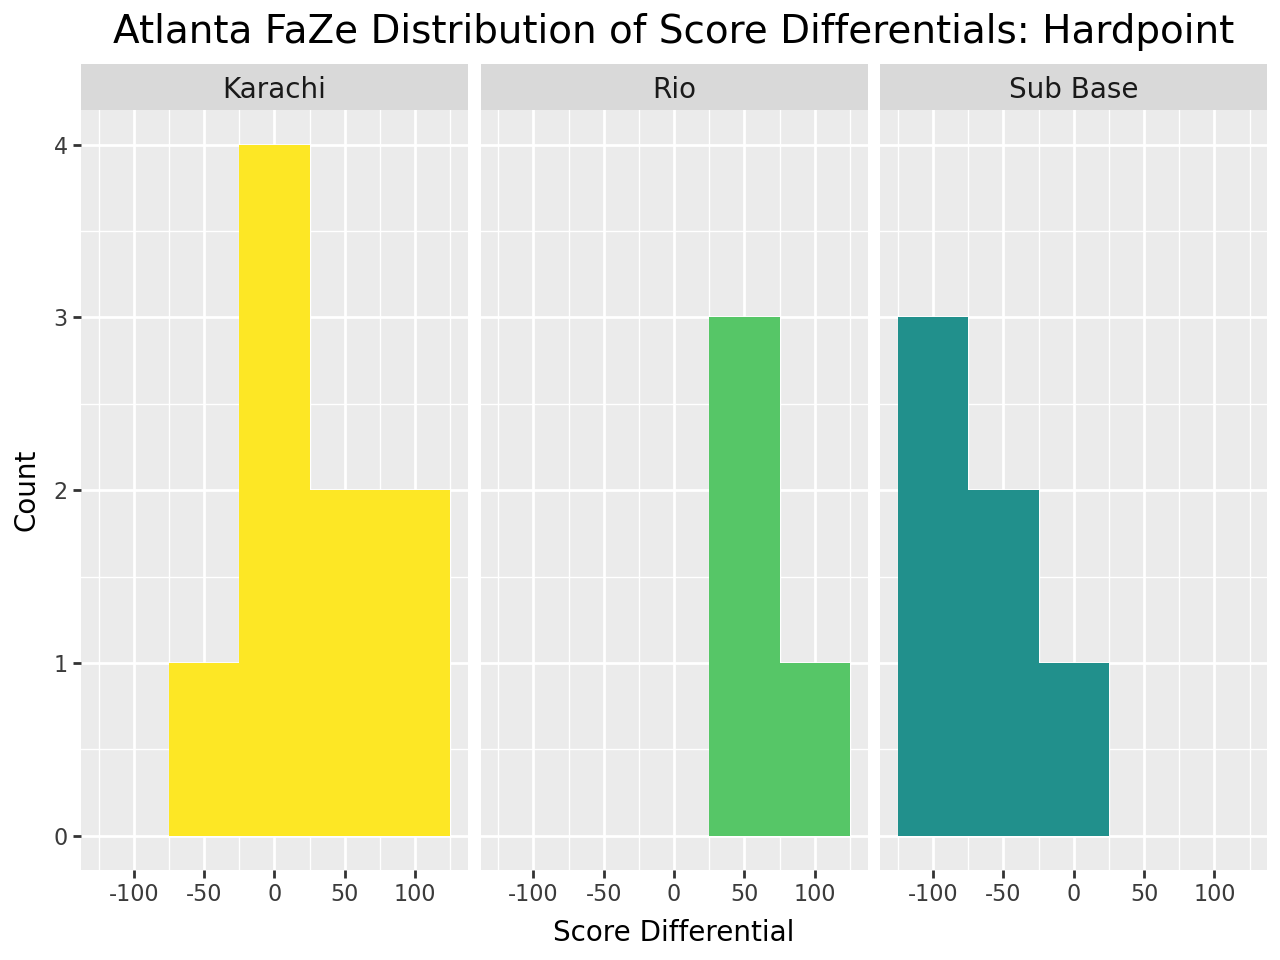

In [56]:
# Score Differentials by Map & Mode
ggplot(
    cdlDF[(cdlDF["gamemode"] == "Hardpoint") & \
          ~(cdlDF["map_name"].isin(maps_to_filter["Hardpoint"])) & \
          (cdlDF["team"] == "Atlanta FaZe")] \
      [["match_id", "map_name", "score_diff"]].drop_duplicates(),
    aes(x = "score_diff", fill = "map_name")
  ) + \
  geom_histogram(binwidth = gamemode_bins["Hardpoint"]) + \
  facet_wrap("~map_name") + \
  scale_fill_manual(values = viridis_gamemode_color_scales["Hardpoint"]) + \
  labs(title = "Atlanta FaZe" + " Distribution of Score Differentials: " + "Hardpoint", 
       fill = "Map") + \
  xlab("Score Differential") + ylab("Count") + \
  theme(
      plot_title = element_text(size = 14),
      strip_text = element_text(size = 10), 
      axis_title = element_text(size = 10), 
      axis_text_x = element_text(size = 8, color = "#3b3b3b"), 
      axis_text_y = element_text(size = 8, color = "#3b3b3b"), 
      legend_position = "none", 
  )

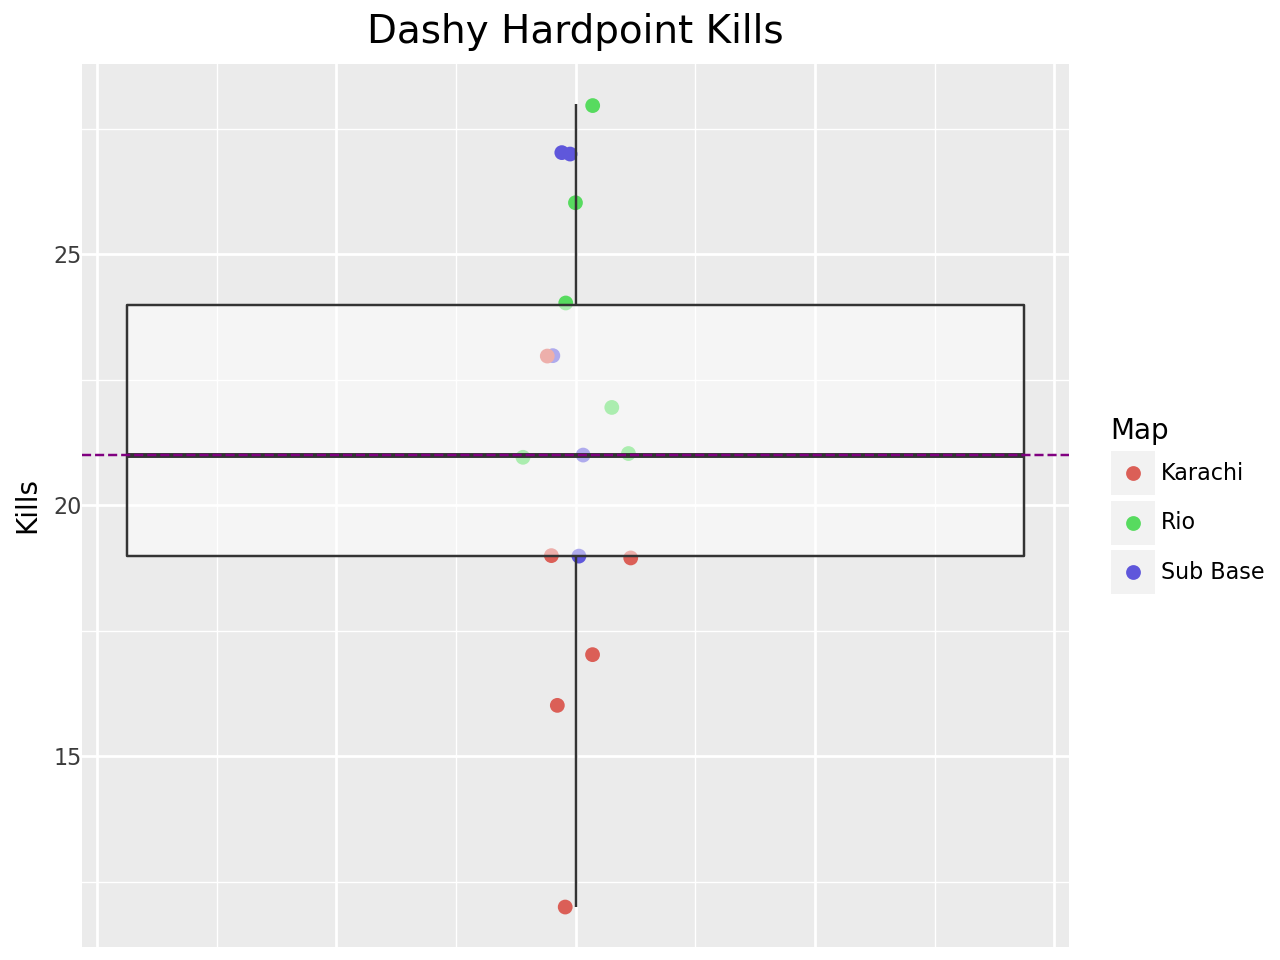

In [98]:
# Player Kills Overview
ggplot(
    cdlDF[(cdlDF["gamemode"] == "Hardpoint") & \
          ~(cdlDF["map_name"].isin(maps_to_filter["Hardpoint"])) & \
          (cdlDF["player"] == "Dashy")],
    aes(y = "kills")
  ) + \
      geom_jitter(
          aes(x = "dummy_x", color = "map_name"), size = 2, width = 0.05, height = 0.05, 
          ) + \
      geom_boxplot(alpha = 0.5, outlier_alpha = 0) + \
      geom_hline(yintercept = 21, linetype = "dashed", color = 'purple') + \
      labs(title = "Dashy" + " " + "Hardpoint" + " Kills",
           color = "Map") + \
      xlab("") + ylab("Kills") + \
      theme(
          plot_title = element_text(size = 14),
          axis_title = element_text(size = 10), 
          axis_text_x = element_blank(), 
          axis_ticks = element_blank(), 
          axis_text_y = element_text(size = 8, color = "#3b3b3b"), 
          legend_title = element_text(size = 10), 
          legend_text = element_text(size = 8),
          # plot_margin = (0.1, 0.15, 0.15, 0.15)
      )

In [ ]:
# Player Kills vs. Time

In [ ]:
# Player Kills vs Total Score

In [ ]:
# Player Kills vs Score Diff